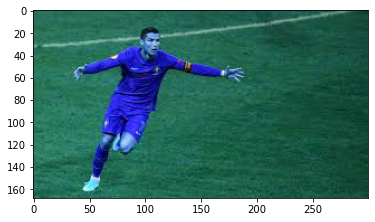

In [197]:
#open cv and part 2
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Loads a color image. 
img = cv2.imread('cr7.jpg',cv2.IMREAD_COLOR)
plt.imshow(img)

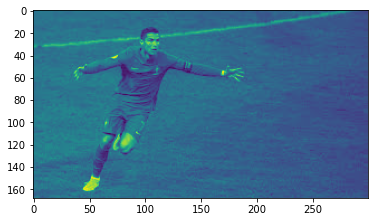

In [198]:
#Loading image in grayscale
img = cv2.imread('cr7.jpg',cv2.IMREAD_GRAYSCALE) # multiple implementations of the grayscale conversion in play

plt.imshow(img)

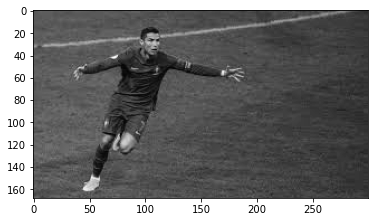

In [199]:
import matplotlib.pyplot as plt
img = cv2.imread("cr7.jpg")  
img_array = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #The function cvtColor() converts an input image from one color space to another

plt.imshow(img_array,cmap="gray") #cmap controls the colormap used to display the values.

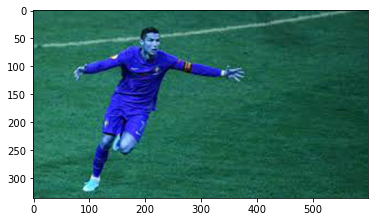

In [200]:
#scaling
height, width = img.shape[:2] #it returns 3 values :width,height,channel
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

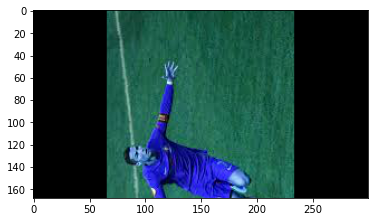

In [201]:
#rotn
rows,cols = img.shape[:2]
#Find Transformation matrix M
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)#(center, angle, scale) Rotation Matrix

dst = cv2.warpAffine(img,M,(cols,rows)) #affine transformation to rotate
plt.imshow(dst)


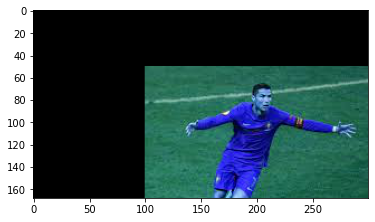

In [202]:
#translation
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,50]]) #Translation Matrix M ,and make it numpy array
 #If you know the shift in (100,50) direction, let it be (t_x,t_y), you can create the transformation matrix M.
    
#Then Pass M to warpAffine()    
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)

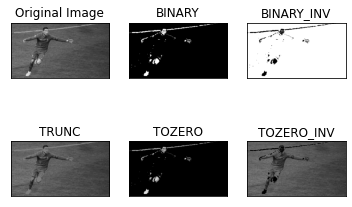

In [203]:
#thresholding (filter)
#used open cv tutorial for this
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('cr7.jpg',0) #convert to gray scale 

#Simple Thresholding Types
#The functions transforms a grayscale image to a binary image according to their formulae

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY) #returns:thresholded image and ret:threshold value used
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

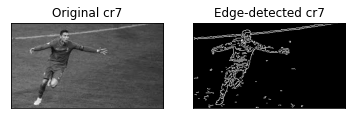

In [204]:
#edge detection using canny filter
#used tutorials and other resources
img = cv2.imread('cr7.jpg',0)
edges = cv2.Canny(img,150,100) # (img,min threshold,max threshold)

plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray') 
plt.title('Original cr7'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge-detected cr7'), plt.xticks([]), plt.yticks([])

plt.show()

In [205]:
#the next assignment: using CNN and keras - part 1
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation #layers API
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [206]:
from keras.datasets import mnist

In [207]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

print("X_train shape after reshaping", X_train.shape)
print("y_train shape after reshaping", y_train.shape)
print("X_test shape after reshaping", X_test.shape)
print("y_test shape after reshaping", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)
X_train shape after reshaping (60000, 28, 28, 1)
y_train shape after reshaping (60000,)
X_test shape after reshaping (10000, 28, 28, 1)
y_test shape after reshaping (10000,)


Text(0.5, 1.0, '1')

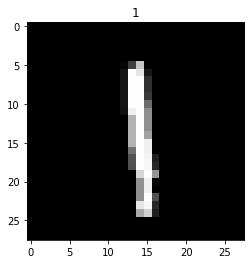

In [208]:
plt.imshow(X_train[8], cmap='gray')
plt.title(y_train[8])

In [209]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [210]:
""""
model = Sequential()

model.add(Dense(512, input_dim=784))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))
""""

SyntaxError: EOL while scanning string literal (<ipython-input-210-151195f1724b>, line 25)

In [ ]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [211]:
""""
size = int(len(X_train) * 0.8)

train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

"""""

'"\nsize = int(len(X_train) * 0.8)\n\ntrain_x, val_x = X_train[:size], X_train[size:]\ntrain_y, val_y = Y_train[:size], Y_train[size:]\n\n'

In [212]:
#model.fit(train_x, train_y, batch_size=128, epochs=7, validation_data=(val_x, val_y))

In [213]:
#score = model.evaluate(X_test, Y_test)
#print()
#print('Test accuracy: ', score[1])

In [214]:
#noticed that this works better, borrowed from net

from keras.preprocessing.image import ImageDataGenerator

#This is done to make our image classification model flexible enough in different scenarios
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [215]:

img_rows=X_train[0].shape[0]
img_cols=X_test[0].shape[0]
print(X_train.shape)
print(img_rows," ",img_cols)
Input_shape=(img_rows,img_cols,1)
print(y_train.shape)

(60000, 28, 28, 1)
28   28
(60000, 10)


In [216]:
model = Sequential() #linear stack of layers
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), padding='same',activation='relu'))

#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2)) #to prevent overfitting
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(BatchNormalization()) #re-centering and rescaling the pixels to train faster
model.add(Dense(num_classes, activation='softmax')) #all neurons are connected to all next layer neurons, softmax gives prob
 

In [217]:
"""
model = Sequential() 
model.add(Conv2D(32, kernel_size =(5, 5), strides =(1, 1), 
                 activation ='relu')) 
model.add(MaxPooling2D(pool_size =(2, 2), strides =(2, 2))) 
model.add(Conv2D(64, (5, 5), activation ='relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Flatten()) 
model.add(Dense(1000, activation ='relu')) 
model.add(Dense(10, activation ='softmax')) 
"""

"\nmodel = Sequential() \nmodel.add(Conv2D(32, kernel_size =(5, 5), strides =(1, 1), \n                 activation ='relu')) \nmodel.add(MaxPooling2D(pool_size =(2, 2), strides =(2, 2))) \nmodel.add(Conv2D(64, (5, 5), activation ='relu')) \nmodel.add(MaxPooling2D(pool_size =(2, 2))) \nmodel.add(Flatten()) \nmodel.add(Dense(1000, activation ='relu')) \nmodel.add(Dense(10, activation ='softmax')) \n"

In [218]:
epochs = 20
optimizer = 'adam'

In [219]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [220]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 24s 39ms/step - loss: 0.2504 - accuracy: 0.9253 - val_loss: 0.0589 - val_accuracy: 0.9813
Epoch 2/5
600/600 [==============================] - 24s 39ms/step - loss: 0.0470 - accuracy: 0.9862 - val_loss: 0.0498 - val_accuracy: 0.9838
Epoch 3/5
600/600 [==============================] - 23s 39ms/step - loss: 0.0295 - accuracy: 0.9914 - val_loss: 0.0400 - val_accuracy: 0.9864
Epoch 4/5
600/600 [==============================] - 23s 39ms/step - loss: 0.0191 - accuracy: 0.9945 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 5/5
600/600 [==============================] - 24s 39ms/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.0427 - val_accuracy: 0.9872


In [221]:
print(model.summary())

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               802944    
_________________________________________________________________
batch_normalization_13 (Batc (None, 128)               512       
_________________________________________________________________
dense_42 (Dense)             (None, 10)              